# ES 335 Prerequisite Quiz

### 1. How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

Consider matrix A which is a (n,k) matrix and matrix B, which is a (k,m) matrix. Then, matrix C = AB has the shape (n,m).
An element in matrix C, $C_{ij}$ is defined as:
$$
C_{ij} = \sum_{l=1}^{k} A_{il} B_{lj}
$$

where $(1 \leq i \leq n)\:and\:(1 \leq j \leq m).$
- **Multiplication**:
    For each element $C_{ij}$ in C, we perform k multiplications (one for each element in the row of A and a column of B). There are n*m elements in C. Thus, the total number of multiplications are n * m * k.

- **Addition**:
    In the similar fashion, to compute each element $C_{ij}$ we have to perform k-1 additions in oeder to sum up the k products. Again there are n*m elements in C. Thus, the toal number of additions are n * m * (k-1).

### 2. Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

1. Using list of lists:

In [24]:
def mat_mul(A,B):
    n = len(A)
    k = len(B)
    m = len(B[0])
    
    C = [[0 for j in range(m)] for i in range(n)]
    
    for i in range(n):
        for j in range(m):
            C[i][j] = sum(A[i][l] * B[l][j] for l in range(k))
    
    return C

#example usage
A=[[1,0,1],[1,1,0],[0,1,1]]
B=[[3,4,5],[8,9,2],[7,6,1]]
print(mat_mul(A,B))

[[10, 10, 6], [11, 13, 7], [15, 15, 3]]


2. Using Numpy

In [30]:
import numpy as np

def matrix_mul(A,B):
    return np.matmul(A,B)

#example usage
print(matrix_mul(A,B))

[[10 10  6]
 [11 13  7]
 [15 15  3]]


3. Comparing the timing of both solutions

In [3]:
import time
#Generating sample matrices
A = np.random.rand(500, 500)
B = np.random.rand(500, 500)

# Using lists of lists
start = time.time()
mat_mul(A.tolist(), B.tolist())
end = time.time()
print("Time using lists of lists (in sec):", end - start)

# Using NumPy
start = time.time()
matrix_mul(A, B)
end = time.time()
print("Time using NumPy (in sec):", end - start)

Time using lists of lists (in sec): 21.406716346740723
Time using NumPy (in sec): 0.01956486701965332


NumPy is implemented in C, which allows it to execute operations much faster than native Python code. Moreover, NumPy uses vectorized operations, which means that it performs operations on entire arrays (or large blocks of data) at once, rather than element-by-element. This reduces the overhead of loops. Also, NumPy can automatically parallelize operations across multiple cores of a CPU, taking advantage of modern multi-core processors. This parallel execution significantly speeds up operations like matrix multiplication. 

### 3. Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

1. Naive Approach

In [27]:
def find_median_naive(arr):
    n=len(arr)
    if n%2 == 1:
        med_idx=n // 2
    else:
        med_idx=n // 2 - 1
        
    for i in range(med_idx+1):
        min_index=0
        for j in range(1,len(arr)):
            if arr[j]<arr[min_index]:
                min_index=j
        min_value=arr.pop(min_index)

    if n%2 == 1:
        return min_value
    else:
        # If the length is even, we need the average of the two middle elements
        second_min_index = 0
        for j in range(1, len(arr)):
            if arr[j] < arr[second_min_index]:
                second_min_index = j
        second_min_value = arr.pop(second_min_index)
        return (min_value + second_min_value) / 2

lst=[6,2,8,4,10,12,1,30]
print(find_median_naive(lst))

7.0


Because of nested loops,<br>
Time complexity = $O(n * n//2)$<br>
Time complexity = $O(n^2)$

thus, finding the median by repeatedly finding the minimum element would have a time complexity of $O(n^2)$.

2. A better aprroach

In [28]:
def partition(arr, low, high):
    pivot=arr[low]
    i=low
    j=high
    while i<j:
        while i<=high-1 and arr[i]<=pivot:
            i+=1
        while j>=low+1 and arr[j]>pivot:
            j -=1
        if i<j:
            arr[i],arr[j] = arr[j],arr[i]
    arr[low],arr[j] = arr[j],arr[low]
    return j

def quickSelect(arr, k, low, high):
    index = partition(arr, low, high)
    if index + 1 == k:
        return arr[index]
    elif index + 1 < k:
        return quickSelect(arr, k, index + 1, high)
    else:
        return quickSelect(arr, k, low, index - 1)

def find_median_better(arr):
    size=len(arr)
    if size % 2 != 0:
        k = (size // 2) + 1
        median = quickSelect(arr, k, 0, size - 1)
        return median
    else:
        k = size // 2
        median1 = quickSelect(arr, k, 0, size - 1)
        median2 = quickSelect(arr, k + 1, 0, size - 1)
        median = (median1 + median2) / 2.0
        return median

lst=[6,2,8,4,10,12,1,30]
print(find_median_better(lst))

7.0


This algorithm uses quickselect function to find kth smallest element from the array.
The average time complexity of this algorithm is $O(n)$. 

3. Using NumPy

In [29]:
def find_median_np(arr):
    return np.median(arr)

lst=[6,2,8,4,10,12,1,30]
print(find_median_naive(lst))

7.0


4. Comparing the timimg of all three solutions

In [7]:
#Generating sample array
arr = np.random.rand(1000)

# Using naive approach
start = time.time()
find_median_naive(arr.tolist())
end = time.time()
print("Time using naive approach (in sec):", end - start)

# Using a better approach
start = time.time()
find_median_better(arr)
end = time.time()
print("Time using a better approach (in sec):", end - start)

# Using NumPy
start = time.time()
find_median_np(arr)
end = time.time()
print("Time using NumPy (in sec):", end - start)

Time using naive approach (in sec): 0.040657758712768555
Time using a better approach (in sec): 0.008087635040283203
Time using NumPy (in sec): 0.0030133724212646484


### 4. What is the gradient of the following function with respect to x and y?
### $$x^2y+y^3sin(x)$$

##### Let f = $x^2y+y^3sin(x)$ <br>
##### Thus, <br>
##### $\frac{\partial f}{\partial x}$ = $2xy+y^3cos(x)$ and<br>
##### $\frac{\partial f}{\partial y}$ = $x^2+3y^2sin(x)$

### 5.Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y



In [8]:
import jax
import jax.numpy as jnp

def f(x, y):
    return x**2 * y + y**3 * jnp.sin(x)

grad_f = jax.grad(f, (0, 1))

x = np.random.random()
y = np.random.random()
gradient = grad_f(x, y)

grad_x = float(gradient[0])
grad_y = float(gradient[1])

print(f"Gradient of f(x, y) at (x, y) = ({x}, {y}): (grad_x: {grad_x}, grad_y: {grad_y})")

Gradient of f(x, y) at (x, y) = (0.8811547483557675, 0.17230529397911232): (grad_x: 0.30691012740135193, grad_y: 0.845146894454956)


### 6.Use sympy to confirm that you obtain the same gradient analytically.

In [21]:
import sympy as sp

x, y = sp.symbols('x y')
f_sympy = x**2 * y + y**3 * sp.sin(x)

grad_f_sympy = [sp.diff(f_sympy, var) for var in (x, y)]
print("SymPy gradient wrt x:")
display(grad_f_sympy[0])
print("SymPy gradient wrt y:")
display(grad_f_sympy[1])


SymPy gradient wrt x:


2*x*y + y**3*cos(x)

SymPy gradient wrt y:


x**2 + 3*y**2*sin(x)

### 7.Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:
1. **2022**
   1. **Branch 1**
      1. Roll Number: 1, Name: N, Marks:
         1. Maths: 100, English: 70..
   2. **Branch 2**

2. **2023**
   1. **Branch 1**
   2. **Branch 2**

3. **2024**
   1. **Branch 1**
   2. **Branch 2**

4. **2025**
   1. **Branch 1**
   2. **Branch 2**   2. **Branch 2**


In [10]:
students = {
    2022: {
        'Branch 1': {
            1: {'Name': 'N', 'Marks': {'Maths': 100, 'English': 70}}
        },
        'Branch 2': {}
    },
    2023: {
        'Branch 1': {},
        'Branch 2': {}
    },
    2024: {
        'Branch 1': {},
        'Branch 2': {}
    },
    2025: {
        'Branch 1': {},
        'Branch 2': {}
    },
}


### 8. Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [11]:
class Student:
    def __init__(self, roll_number, name, marks):
        self.roll_number = roll_number
        self.name = name
        self.marks = marks

class Branch:
    def __init__(self, name):
        self.name = name
        self.students = []

    def add_student(self, student):
        self.students.append(student)

class Year:
    def __init__(self, year):
        self.year = year
        self.branches = []

    def add_branch(self, branch):
        self.branches.append(branch)

class Database:
    def __init__(self):
        self.years = []

    def add_year(self, year):
        self.years.append(year)

# Example usage
db = Database()

year_2022 = Year(2022)
branch_1 = Branch('Branch 1')
student_1 = Student(1, 'N', {'Maths': 100, 'English': 70})
branch_1.add_student(student_1)
year_2022.add_branch(branch_1)

db.add_year(year_2022)


### 9. Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.
1. $y=x$
1. $y=x^2$
1. $y=x^3/100$
1. $y=sin(x)$
1. $y=sin(x)/x$
1. $y=log(x)$
1. $y=e^x$

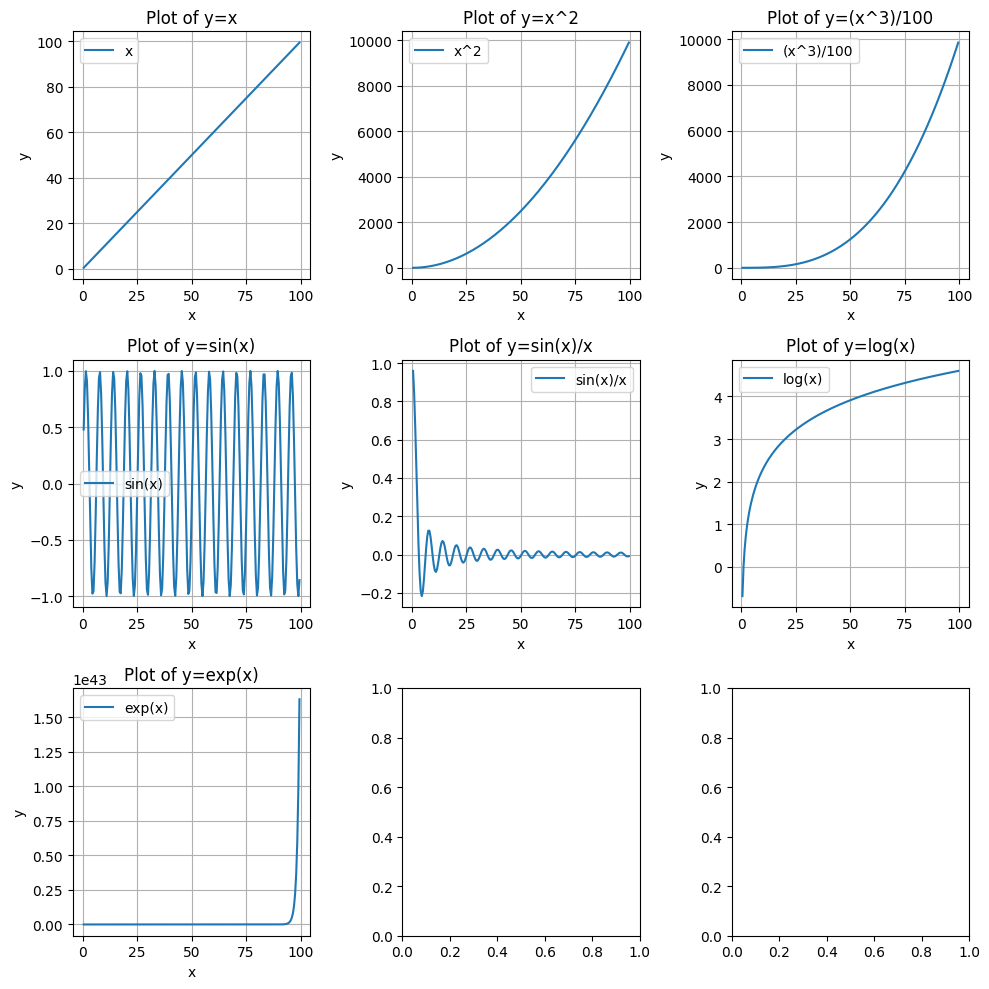

In [31]:
import matplotlib.pyplot as plt
x = np.arange(0.5, 100.0, 0.5)

fig, axs = plt.subplots(3, 3, figsize=(10, 10))
axs = axs.flatten()
axs[0].plot(x, x, label='x')
axs[0].set_title('Plot of y=x')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[0].legend()
axs[0].grid(True)

axs[1].plot(x, x**2, label='x^2')
axs[1].set_title('Plot of y=x^2')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
axs[1].legend()
axs[1].grid(True)

axs[2].plot(x, x**3/100, label='(x^3)/100')
axs[2].set_title('Plot of y=(x^3)/100')
axs[2].set_xlabel('x')
axs[2].set_ylabel('y')
axs[2].legend()
axs[2].grid(True)

axs[3].plot(x, np.sin(x), label='sin(x)')
axs[3].set_title('Plot of y=sin(x)')
axs[3].set_xlabel('x')
axs[3].set_ylabel('y')
axs[3].legend()
axs[3].grid(True)
 
axs[4].plot(x, np.sin(x)/x, label='sin(x)/x')
axs[4].set_title('Plot of y=sin(x)/x')
axs[4].set_xlabel('x')
axs[4].set_ylabel('y')
axs[4].legend()
axs[4].grid(True)
 
axs[5].plot(x, np.log(x), label='log(x)')
axs[5].set_title('Plot of y=log(x)')
axs[5].set_xlabel('x')
axs[5].set_ylabel('y')
axs[5].legend()
axs[5].grid(True)
 
axs[6].plot(x, np.exp(x), label='exp(x)')
axs[6].set_title('Plot of y=exp(x)')
axs[6].set_xlabel('x')
axs[6].set_ylabel('y')
axs[6].legend()
axs[6].grid(True)

fig.tight_layout()  
plt.show()


### 10. Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [13]:
import pandas as pd
matrix = np.random.uniform(1, 2, size=(20, 5))
df = pd.DataFrame(matrix, columns=['a', 'b', 'c', 'd', 'e'])
maxstd = df.std().idxmax()
minmean = df.mean(axis=1).idxmin()

print("The column with the highest standard deviation: ",maxstd) 
print("The row with the lowest mean: ",minmean)

The column with the highest standard deviation:  c
The row with the lowest mean:  3


### 11. Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [14]:
df['f'] = df[['a', 'b', 'c', 'd', 'e']].sum(axis=1)
df['g'] = np.where(df['f'] < 8, 'LT8', 'GT8')
temp1 = df[df['g'] == 'LT8'].shape[0]

temp2 = df[df['g'] == 'LT8']['f'].std()
temp3 = df[df['g'] == 'GT8']['f'].std()

print("The number of rows in the dataframe where the value in the column “g” is “LT8”: ",temp1 )
print("The standard deviation of the column “f” for the rows where the value in the column “g” is “LT8”: ",temp2)
print("The standard deviation of the column “f” for the rows where the value in the column “g” is “GT8”: ",temp3)


The number of rows in the dataframe where the value in the column “g” is “LT8”:  15
The standard deviation of the column “f” for the rows where the value in the column “g” is “LT8”:  0.6620763785594779
The standard deviation of the column “f” for the rows where the value in the column “g” is “GT8”:  0.3815560621456949


### 12. Write a small piece of code to explain broadcasting in numpy.

In [32]:
a=np.array([[1],[2],[3]])
print("a =")
print(a)
print("Shape of a: ",a.shape)
b=np.array([1,2,3])
print("b =")
print(b)
print("Shape of b: ",b.shape)
print("a+b =")
print(a+b) #observe!
print("Shape of a+b: ",(a+b).shape)

a =
[[1]
 [2]
 [3]]
Shape of a:  (3, 1)
b =
[1 2 3]
Shape of b:  (3,)
a+b =
[[2 3 4]
 [3 4 5]
 [4 5 6]]
Shape of a+b:  (3, 3)


Broadcasting is the ability of numpy to perform arithmetic operations on arrays of dissimilar size.
The smaller array is broadcast to the size of the larger array so that they have compatible shapes.
Broadcasting avoids unnecessary data copies and leads to vectorized and memory-efficient implementations.
In essence, it alligns arrays to make their shapes compatible for element-wise operations. It also work on scalars.

### 13. Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [33]:
def argmin(arr):
    min_index = 0
    min_value = arr[0]
    for i in range(1, len(arr)):
        if arr[i] < min_value:
            min_value = arr[i]
            min_index = i
    return min_index

arr = np.random.rand(10)
argmin_index = argmin(arr)
numpy_argmin_index = np.argmin(arr)

print(argmin_index)
print(numpy_argmin_index)
if(argmin_index==numpy_argmin_index):
    print("Verified!")

8
8
Verified!
